<a href="https://colab.research.google.com/github/e19166/e19-4yp-Dynamic-Multi-Dimensional-Resource-Orchestration-in-Kubernetes/blob/main/results/hashgen_both_limits_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('hashgen_both_limit_reduction.csv')
df.head()  # to preview the data

,Timestamp,Service,CPU Request,Memory Request,CPU Limit,Memory Limit,Latency,CPU Usage,Memory Usage
0,2025-05-12T06:30:34.449000,hash-gen-deployment,0.1,134217728,0.2,268435456,0.020699,0.033967,158633984
1,2025-05-12T06:31:04.526000,hash-gen-deployment,0.1,134217728,0.2,268435456,0.020699,0.037560,158633984
2,2025-05-12T06:31:34.602000,hash-gen-deployment,0.1,134217728,0.2,268435456,0.020699,0.038096,158633984
3,2025-05-12T06:32:04.675000,hash-gen-deployment,0.1,134217728,0.2,268435456,0.020613,0.035347,158633984
4,2025-05-12T06:32:34.753000,hash-gen-deployment,0.1,134217728,0.2,268435456,0.020376,0.034640,158633984


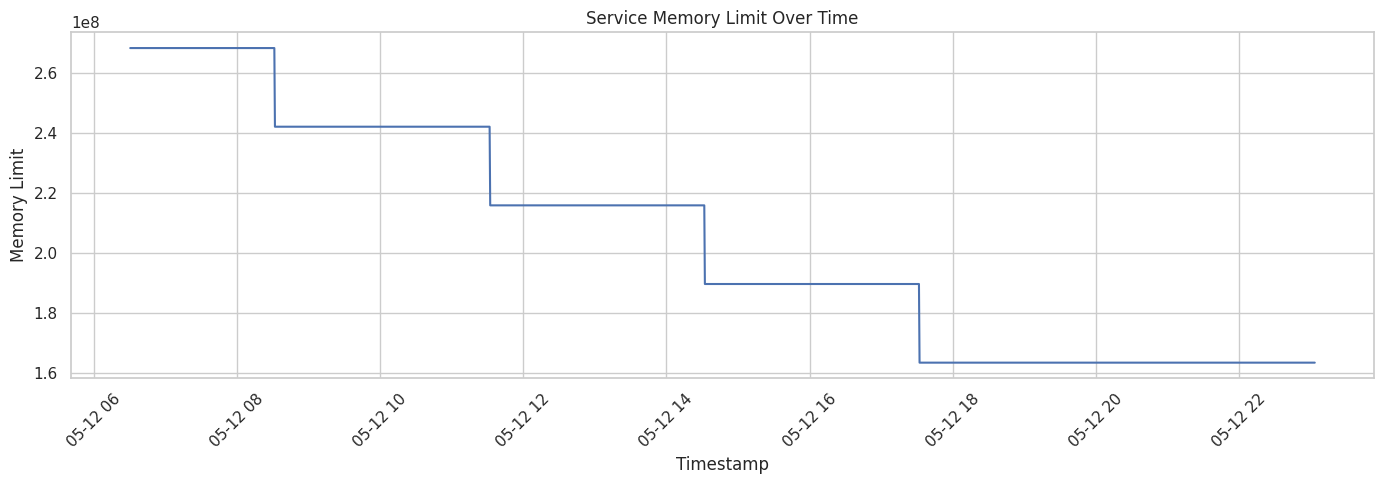

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')


# Set visual style
sns.set(style="whitegrid")

# Plotting functions
def plot_time_series(x, y, ylabel, title):
  plt.figure(figsize=(14, 5))
  sns.lineplot(x=x, y=y)
  plt.ylabel(ylabel)
  plt.xlabel("Timestamp")
  plt.title(title)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

# 1. Latency over time
plot_time_series(df['Timestamp'], df['Memory Limit'], 'Memory Limit', 'Service Memory Limit Over Time')